In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cuda


In [2]:
x = torch.rand(5, 3)
print(x)

tensor([[0.8854, 0.4243, 0.2893],
        [0.8358, 0.9129, 0.3120],
        [0.5592, 0.2955, 0.8139],
        [0.6356, 0.0458, 0.0684],
        [0.5003, 0.9225, 0.5312]])


In [3]:
print(x.size())

torch.Size([5, 3])


In [4]:
y = torch.rand(5, 3)
z = x + y
print(z)

tensor([[0.9299, 1.1276, 0.9218],
        [0.9860, 1.7485, 0.7756],
        [1.0366, 0.6210, 1.2175],
        [0.9813, 0.5023, 0.6716],
        [0.8637, 1.5655, 1.2282]])


In [5]:
t = x.numpy()
print(t)

[[0.8853531  0.42434156 0.28928554]
 [0.83581257 0.9129179  0.3119768 ]
 [0.5591813  0.2955262  0.813907  ]
 [0.6355772  0.04578692 0.06836361]
 [0.5003161  0.92254597 0.53121024]]


In [6]:
u = torch.from_numpy(t)
print(u)

tensor([[0.8854, 0.4243, 0.2893],
        [0.8358, 0.9129, 0.3120],
        [0.5592, 0.2955, 0.8139],
        [0.6356, 0.0458, 0.0684],
        [0.5003, 0.9225, 0.5312]])


In [7]:
 class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out): #D_in/H/D_out: dim of input/hidden/output layer
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

In [8]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Move the model to GPU
model.to(device)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x.to(device)) # Don’t forget x.to(device)

    # Compute and print loss
    loss = criterion(y_pred, y.to(device)) # Don’t forget y.to(device)
    if t % 100 == 99:
        print(t, loss.item())
        # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

99 2.8331403732299805
199 0.0356934554874897
299 0.0008704424253664911
399 2.444941310386639e-05
499 7.281616376531019e-07


In [9]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True, #for training
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4, #process 4 images at a time
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False, #not for training
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=4, #process 4 images at a time
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

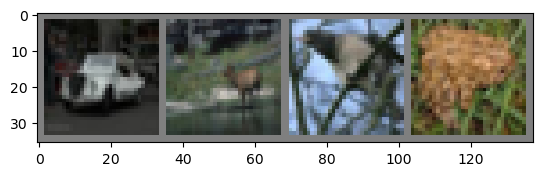

  car  deer  bird  frog


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print true labels of the images
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        f = self.pool(F.relu(self.conv1(x)))  #f = self.conv1(x),
                                              #f = F.relu(f),
                                              #f = self.pool(f)
        f = self.pool(F.relu(self.conv2(f)))  #f = self.conv2(f),
                                              #f = F.relu(f),
                                              #f = self.pool(f)

        f = f.view(-1, 16 * 5 * 5) #make a 16x5x5 tensor to 16x5x5-dimensional vector
        f = F.relu(self.fc1(f))
        f = F.relu(self.fc2(f))
        f = self.fc3(f)

        return f

net = Net()

In [12]:

import torch.optim as optim
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.AdamW(net.parameters(), lr=0.0005) #lr: learning rate

In [29]:
import time
import matplotlib.pyplot as plt

net.to(device)
start_time = time.time()
loss_history = []
epoch = 50

for e in range(epoch):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
 # data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

 # set the parameter gradients to zeros
        optimizer.zero_grad()

 # forward
        outputs = net(inputs)

 #calculate errors
        loss = criterion(outputs, labels) #calculate errors

        #backward
        loss.backward()
        optimizer.step()

        running_loss += loss.item() # update total loss
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('epoch: %d, batches: %5d, loss: %.3f' %
    (e + 1, i + 1, running_loss / 2000))
            loss_history.append(running_loss)
            running_loss = 0.0

epoch: 1, batches:  2000, loss: 1.899
epoch: 1, batches:  4000, loss: 1.636
epoch: 1, batches:  6000, loss: 1.516
epoch: 1, batches:  8000, loss: 1.476
epoch: 1, batches: 10000, loss: 1.388
epoch: 1, batches: 12000, loss: 1.326
epoch: 2, batches:  2000, loss: 1.286
epoch: 2, batches:  4000, loss: 1.244
epoch: 2, batches:  6000, loss: 1.225
epoch: 2, batches:  8000, loss: 1.231
epoch: 2, batches: 10000, loss: 1.191
epoch: 2, batches: 12000, loss: 1.192
epoch: 3, batches:  2000, loss: 1.098
epoch: 3, batches:  4000, loss: 1.136
epoch: 3, batches:  6000, loss: 1.114
epoch: 3, batches:  8000, loss: 1.119
epoch: 3, batches: 10000, loss: 1.101
epoch: 3, batches: 12000, loss: 1.097
epoch: 4, batches:  2000, loss: 1.020
epoch: 4, batches:  4000, loss: 1.018
epoch: 4, batches:  6000, loss: 1.042
epoch: 4, batches:  8000, loss: 1.013
epoch: 4, batches: 10000, loss: 1.017
epoch: 4, batches: 12000, loss: 1.051
epoch: 5, batches:  2000, loss: 0.943
epoch: 5, batches:  4000, loss: 0.962
epoch: 5, ba

In [30]:

print('Training time in %s seconds ----' % (time.time()- start_time))

Training time in 1375.1003222465515 seconds ----


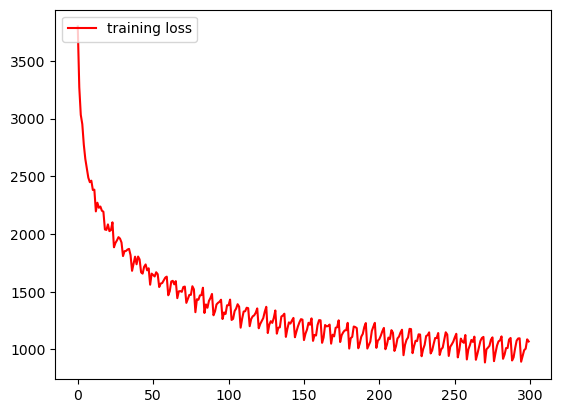

In [31]:

plt.plot(loss_history, label = 'training loss', color = 'r')
plt.legend(loc = 'upper left')
plt.show()

In [13]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

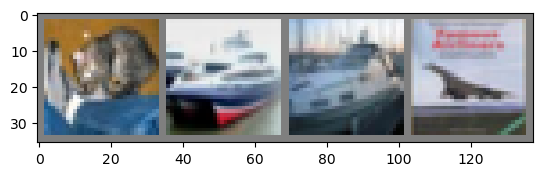

GroundTruth:    cat  ship  ship plane


In [14]:

dataiter = iter(testloader)
images, labels = next(dataiter)

# show images and print ground-truth labels
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
net = Net() #create a network
PATH = './cifar_net.pth'
net.load_state_dict(torch.load(PATH)) #load the trained network
net.to(device)
outputs = net(images.to(device)) #test the network with inputs as images

In [16]:
_, predicted_labels = torch.max(outputs, 1) 
 
print('Predicted: ', ' '.join('%5s' % classes[predicted_labels[j]] 
                              for j in range(4)))

Predicted:  plane plane plane plane


In [17]:
correct = 0 
total = 0 
with torch.no_grad(): 
    for data in testloader: 
        images, groundtruth_labels = data[0].to(device), data[1].to(device) 
        outputs = net(images) 
        _, predicted_labels = torch.max(outputs.data, 1) 
        total += groundtruth_labels.size(0) 
        correct += (predicted_labels == groundtruth_labels).sum().item() 
print('Recognition accuracy on the 10000 test images: %d %%' % (100 * correct / total))

Recognition accuracy on the 10000 test images: 10 %


In [18]:
class_correct = list(0. for i in range(10)) 
class_total = list(0. for i in range(10)) 
with torch.no_grad(): 
    for data in testloader: 
        images, groundtruth_labels = data[0].to(device), data[1].to(device) 
        outputs = net(images) 
        _, predicted_labels = torch.max(outputs, 1) 
        c = (predicted_labels == groundtruth_labels).squeeze() 
        for i in range(4): 
            label = groundtruth_labels[i] 
            class_correct[label] += c[i].item() 
            class_total[label] += 1 
 
for i in range(10): 
    print('Accuracy of %5s : %2d %%' % ( 
        classes[i], 100 * class_correct[i] / class_total[i])) 

Accuracy of plane : 100 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


In [19]:
from torchvision import datasets 
 
transform = transforms.Compose( 
    [transforms.Resize((32, 32)), #you can change the image size, but need to change  
       #the architecture accordingly 
     transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 
 
trainset = datasets.ImageFolder('FoodImages/Train', transform=transform) 
testset = datasets.ImageFolder('FoodImages/Test', transform=transform) 
 
classes = ('Cakes', 'Pasta', 'Pizza') 

In [20]:
PATH = './cifar_net.pth' 
net = Net() 
net.load_state_dict(torch.load(PATH)) 

<All keys matched successfully>

In [21]:
net.fc3 = nn.Linear(84, 3) 

In [22]:
print(net) 

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=3, bias=True)
)


In [24]:
#freeze parameters of conv1 
for param in net.conv1.parameters(): 
    param.requires_grad = False 

In [25]:
#update the optimizer 
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, net.parameters()), lr=0.0005)

In [26]:
print(net.conv1.weight) 
print(net.conv1.bias) 

Parameter containing:
tensor([[[[-0.0538, -0.1036,  0.0961,  0.0797,  0.0274],
          [-0.0797,  0.1042, -0.0873, -0.0573, -0.0042],
          [ 0.0680, -0.0077,  0.0071,  0.0673, -0.0658],
          [ 0.0083, -0.0577,  0.0837, -0.0512,  0.0525],
          [-0.0647,  0.0718,  0.1078,  0.0607,  0.0956]],

         [[-0.0821, -0.0854, -0.0591,  0.0536,  0.0592],
          [ 0.0595, -0.0793,  0.0707,  0.0885, -0.0841],
          [-0.0163, -0.0444,  0.0345,  0.0612,  0.0017],
          [-0.0493,  0.0298,  0.0256,  0.0223,  0.0730],
          [-0.0898,  0.0531,  0.0390,  0.0004, -0.0470]],

         [[ 0.0674, -0.0567, -0.0055,  0.0787,  0.0269],
          [ 0.0689, -0.0202, -0.0426, -0.1086, -0.1114],
          [-0.0813, -0.1123, -0.0329, -0.0058,  0.1059],
          [ 0.0388,  0.0938,  0.0645, -0.0653,  0.0530],
          [ 0.1015,  0.1080,  0.1091, -0.0913,  0.0462]]],


        [[[ 0.1095, -0.0090, -0.0068,  0.1030, -0.0506],
          [-0.0886,  0.0042,  0.0960, -0.1091,  0.0172],
 